# Dealing with inbalanced Dataset

We have a dataset in realisitc proportion, we could oversemple but it will not be good.

We have a lot of IBD events created by Andrea and also a lot of radioactivity events. If we sort them in temporal order we get that there will be a little amount of IBD in all the radioactivity events, because it is more frequently have radioactivity events respect of IBD that are rare. 

So in order to train our ML-algorithm we could use generated IBD events and generated Radioactivity events, so in that cse we have basically the same amount of data and the inbalanced problem will disappear. After the training, we test with inbalaced dataset.

Basically we use a smote 

We will se if it works...

# Loading data

In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
all_feature = pd.read_csv("new_features.csv")

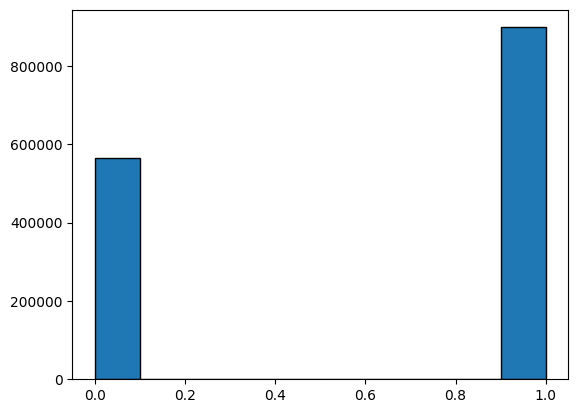

In [5]:
plt.hist(all_feature['Label']); # Almost balanced :)

# ML Classification Algorithms

## XGBClassifier

In [6]:
from sklearn.model_selection import train_test_split

X = all_feature[all_feature.columns[all_feature.columns != 'Label']]
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [7]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb

scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()
#Using default parameters and train
model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=500, max_depth=5, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


/home/ubuntu/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.00026	validation_0-logloss:0.64444	validation_1-error:0.00031	validation_1-logloss:0.64445
[1]	validation_0-error:0.00022	validation_0-logloss:0.60037	validation_1-error:0.00026	validation_1-logloss:0.60038
[2]	validation_0-error:0.00023	validation_0-logloss:0.56030	validation_1-error:0.00029	validation_1-logloss:0.56032
[3]	validation_0-error:0.00023	validation_0-logloss:0.52372	validation_1-error:0.00029	validation_1-logloss:0.52374
[4]	validation_0-error:0.00023	validation_0-logloss:0.49021	validation_1-error:0.00029	validation_1-logloss:0.49023
[5]	validation_0-error:0.00023	validation_0-logloss:0.45940	validation_1-error:0.00027	validation_1-logloss:0.45943
[6]	validation_0-error:0.00021	validation_0-logloss:0.43101	validation_1-error:0.00027	validation_1-logloss:0.43104
[7]	validation_0-error:0.00022	validation_0-logloss:0.40478	validation_1-error:0.00027	validation_1-logloss:0.40481
[8]	validation_0-error:0.00021	validation_0-logloss:0.38049	validation_1

In [8]:
y_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# plt.hist(y_prob, bins = np.linspace(0, 1, 1000), histtype='stepfilled');
# plt.yscale('log')

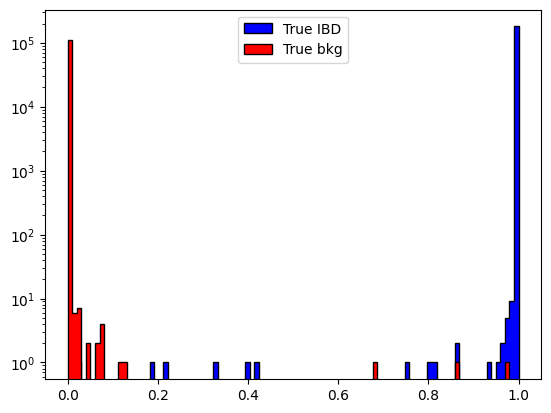

In [10]:
# plt.hist(y_prob[:, 0][y_test == 1], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'b');
# plt.hist(y_prob[:, 0][y_test == 0], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'r');
plt.hist(y_prob[:, 1][y_test == 1], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'b', label = 'True IBD');
plt.hist(y_prob[:, 1][y_test == 0], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'r', label = 'True bkg');
plt.legend()
plt.yscale('log')

,R_prompt,R_delayed,E_pro,delta_radius,E_del,delta_time
1060126,17399.000000,17288.722656,0.868666,7922.021484,0.624546,201872.0
570555,14980.900866,14887.883845,2.796600,123.899449,2.238370,97904.0
409756,16705.047737,17213.079314,3.340500,933.799330,2.328560,37153.0
1277869,10685.900805,10394.262625,6.716620,353.379453,2.198740,129760.0
712413,17316.460105,17268.995361,4.268670,212.138249,2.224650,29392.0
...,...,...,...,...,...,...
1084571,4123.908852,4113.024911,4.588210,505.025960,2.225860,97808.0
92361,9606.238679,9845.316112,3.206300,294.920691,2.266010,98496.0
187860,17399.000000,17399.000000,0.608664,29204.404297,1.605687,846396.0
1373388,15341.684570,17399.000000,0.153395,14079.703125,0.654422,477358.0


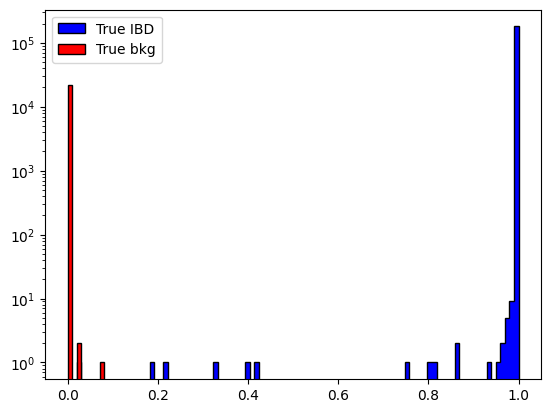

In [23]:
# plt.hist(y_prob[:, 0][y_test == 1], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'b');
# plt.hist(y_prob[:, 0][y_test == 0], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'r');
plt.hist(y_prob[:, 1][y_test == 1], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'b', label = 'True IBD');
plt.hist(y_prob[:, 1][y_test == 0][np.logical_and(X_test['R_prompt'][y_test == 0] < 17200, X_test['R_delayed'][y_test == 0] < 17200)], bins = np.linspace(0, 1, 100), histtype='stepfilled', fc = 'r', label = 'True bkg');
plt.legend()
plt.yscale('log')

In [11]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    112391
         1.0       1.00      1.00      1.00    179962

    accuracy                           1.00    292353
   macro avg       1.00      1.00      1.00    292353
weighted avg       1.00      1.00      1.00    292353



In [12]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[112388,      3],
       [     6, 179956]])

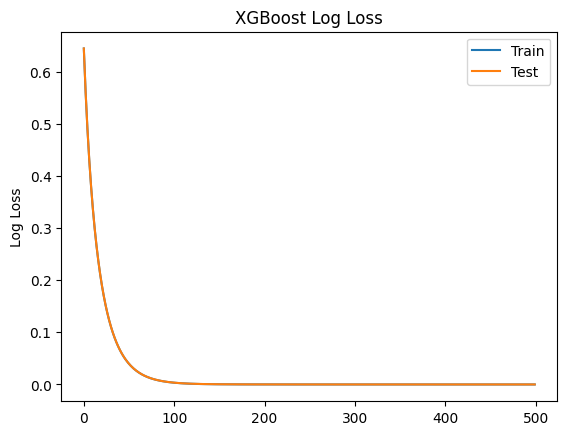

In [13]:
# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')

plt.title('XGBoost Log Loss')

plt.show()


Il codice utilizza il metodo SHAP in combinazione con  XGBoost. Nello specifico, SHAP utilizza il metodo Tree SHAP per spiegare le predizioni dell'algoritmo XGBoost, ovvero valuta il contributo di ogni variabile in ogni nodo dell'albero di decisione utilizzato da XGBoost per la predizione.

/home/ubuntu/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/ubuntu/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_s

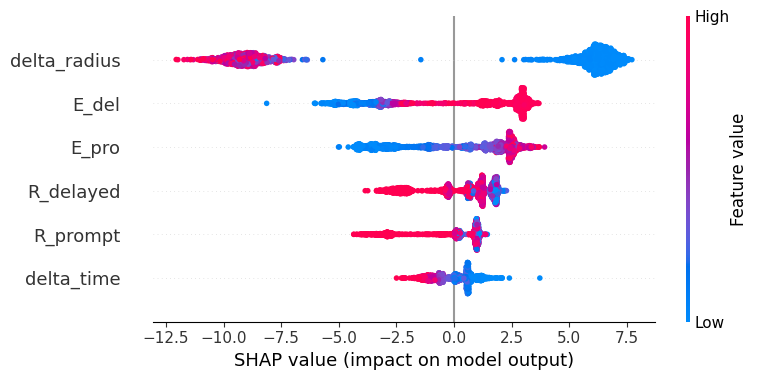

In [14]:
import shap
features_names = X.columns
# # # Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000])
# 
# # # Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
# 
# # # Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names)

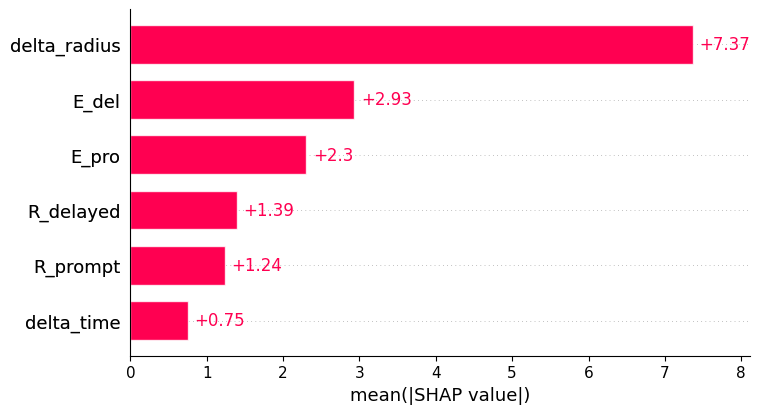

In [15]:
shap.plots.bar(shap_values)

In [43]:
# # Importnce plot
# shap.summary_plot(shap_values, X_test, feature_names=feature_names , plot_type="bar")


Text(0, 0.5, 'Background Rejection')

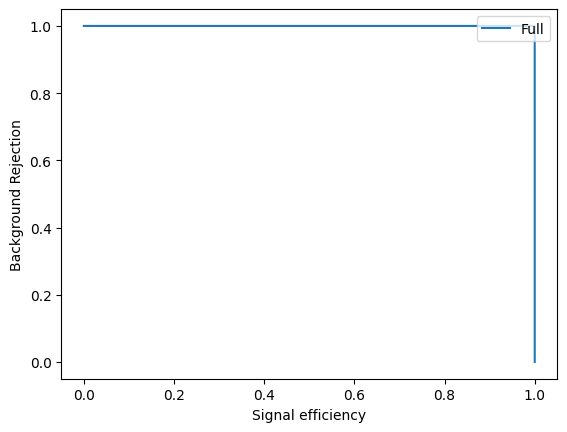

In [16]:
from sklearn.metrics import roc_curve 

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot(tpr, 1-fpr, label='Full')

plt.legend(loc=1)
plt.xlabel('Signal efficiency')
plt.ylabel('Background Rejection')

Optimizing XGBoost

In [17]:
# from sklearn.model_selection import GridSearchCV 

# #Create values to search over
# cv_params = {'max_depth': [3,4,6], #Maximum depth of a tree, increasing increase complxity
#               'min_child_weight': [1,3,5],
#                 'learning_rate':[0.001, 0.01, 0.1, 0.3]} #Step size uset to prevent overfitting 


# ind_params = {'n_estimators': 300, 'seed':1, 'colsample_bytree': 1, 
#              'objective': 'binary:logistic'}

# opt_XGBclassifier = GridSearchCV(xgb.XGBClassifier(**ind_params), 
#                             cv_params, 
#                             scoring = 'accuracy',
#                             cv = 5,
#                             n_jobs = -1,
#                             verbose=3) 

# opt_XGBclassifier.fit(X_train, y_train)
# opt_XGBclassifier.cv_results_

In [18]:
# #Print scores
# print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

# #Find optimal parameters

# print('The optimal parameters for the classifier are:')
# print(opt_XGBclassifier.best_params_)

# #Fit performance on the test set
# XGBclassifier_final=opt_XGBclassifier.best_estimator_
# y_pred_final=XGBclassifier_final.predict(X_test)
# print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
# print("The  AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final)))

## PyTorch Neural Network

In [19]:
# import torch
# import torch.nn as nn

# class Net(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(Net, self).__init__()
#         self.layer1 = nn.Linear(input_size, hidden_size)
#         self.layer2 = nn.Linear(hidden_size, hidden_size)
#         #Here i added a layer because i wanted to try to increase the accuracy thinking that few features are a problem          
#         self.layer3 = nn.Linear(hidden_size, hidden_size)
#         self.layer4 = nn.Linear(hidden_size, num_classes)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.relu(out)
#         out = self.layer2(out)
#         out = self.relu(out)
#         out = self.layer3(out)
#         out = self.relu(out)
#         out = self.layer4(out)
#         return out

# # Example usage
# input_size = 6
# hidden_size = 200
# num_classes = 2
# net = Net(input_size, hidden_size, num_classes).cuda()


# import torch.nn.functional as F
# import torch.optim as optim

# #Define the loss function and the optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# #Train the network
# for epoch in range(10):
     
#     running_loss = 0.0
#     for i in range(0, len(X_train), 4):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs = torch.Tensor(X_train[i:i+4]).cuda()
#         print()
#         labels = torch.LongTensor(y_train[i:i+4]).cuda() #Creando mini-batches di 4 elementi, il tensore delle labels ha dimensione 4x1
        
#         # zero the parameter gradients
#         optimizer.zero_grad()
        
#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels.reshape(-1))
#         loss.backward()
#         optimizer.step()
        
#         # print statistics
#         running_loss += loss.item()
#         if i % 1000 == 999:    # print every 1000 mini-batches
#             print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 1000))
#             running_loss = 0.0

# print('Finished Training')

# #Test the network
# correct = 0
# total = 0
# with torch.no_grad():
#     for i in range(0, len(X_test), 4):
#         inputs = torch.Tensor(X_test[i:i+4]).cuda()
#         labels = torch.LongTensor(y_test[i:i+4]).cuda()
#         outputs = net(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels.reshape(-1)).sum().item()

# print('Accuracy of the network on the 10000: %d %%' % (100 * correct / total))

# # #Save the model
# # PATH = './xgboost_net.pth'
# # torch.save(net.state_dict(), PATH)

# # #Load the model
# # net = Net(input_size, hidden_size, num_classes)
# # net.load_state_dict(torch.load(PATH))




## SVM kernel rbf
I thought that maybe I only get 55% accurcay because there few features and the algorithm is not able to find the best hyperplane in the feature space. So I tried to use a kernel rbf in order to map the features in a higher dimension space, where maybe the algorithm is able to find a better hyperplane.

In [20]:
# from sklearn import svm
# # Definisci il modello SVM
# svm_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# y_train = y_train.ravel()
# # Addestra il modello sui dati di addestramento
# svm_rbf.fit(X_train, y_train)

In [21]:
# accuracy = svm_rbf.score(X_test, y_test)
# print('Accuracy:', accuracy)

# TODO list

[ v ] Create two distinct features' tables (one for 100.000 unoscillated IBDs, one for the 7days radioactivity dataset). Remember to add R_ptompt and R_delayed to the stored features


[ v ] Run your standard selection on the two tables separately to estimate efficiency and purity.


[ v ] Remember to remove the "label == 1" from your function.


[ v ] Concatenate the two tables, shuffle the order of the rows and start experimenting. Check the performances of XGBoost compared to the standard selection.

For any problem, write us and we can discuss about it! Have a nice weekend